In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Read the data

In [2]:
df = pd.read_csv("MART_data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<center> <h1> Data Visualization & Pre-Processing

#### Description of all the features/columns of the dataset

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
df.size

57792

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,4816,1530,FDJ55,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,4022,NaN,NaN,NaN,12.9807,4.65485,4.555,8.895,12.85,17.1,21.35
Item_Fat_Content,4816,5,Low Fat,2899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,4816,NaN,NaN,NaN,0.0658105,0.0512825,0,0.0268917,0.0543325,0.0942518,0.328391
Item_Type,4816,16,Fruits and Vegetables,708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,4816,NaN,NaN,NaN,141.072,62.4706,31.29,93.6114,143.013,186.592,266.888
Outlet_Identifier,4816,10,OUT045,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,4816,NaN,NaN,NaN,1997.87,8.30635,1985,1987,1999,2004,2009
Outlet_Size,3426,3,Medium,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,4816,3,Tier 3,1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  16.486711
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.862126
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

##### Item_Weight and Outlet_Size have null values with high percentage so we cannot drop these values
##### Let us check if the combined column of both these features have null value in common

In [7]:
len(df) - len(df.dropna(axis = 0, how = 'all', subset = {'Item_Weight', 'Outlet_Size'}))

0

From the above output we can see that there are no rows with both the values as null. SO we have to treat them separately without dropping them.

##### Imputing for missing values in weight column

In [8]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer()
df[["Item_Weight"]] = simple_imputer.fit_transform(df[["Item_Weight"]])

df.Item_Weight.isnull().sum()

0

##### Replacing NaN values in Outlet Size with Unknown label

In [9]:
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan, 'Unknown')
df.Outlet_Size.value_counts()

Medium     1537
Unknown    1390
Small      1348
High        541
Name: Outlet_Size, dtype: int64

##### Checking the distribution of numeric variables to find outlier

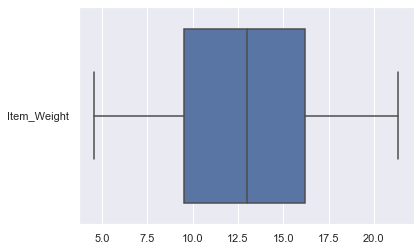

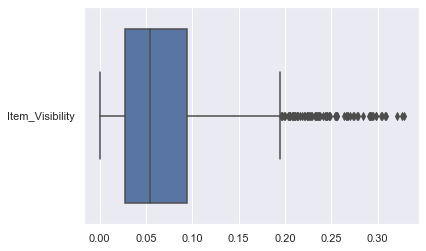

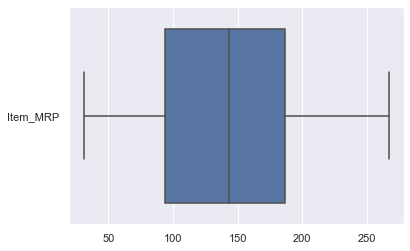

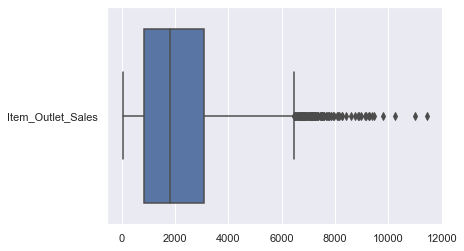

In [10]:
for feature in ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']:
    plt.figure()
    sns.boxplot(data=df[[feature]], orient='h')
    plt.show()

In the above four plots, as we can see, item visibility and outlet sales feature have outliers. Let us remove those outliera and make the two distributions close to normal form.

##### Item_Outlet_Sales

Skewness of Outlet Sales    : 1.136


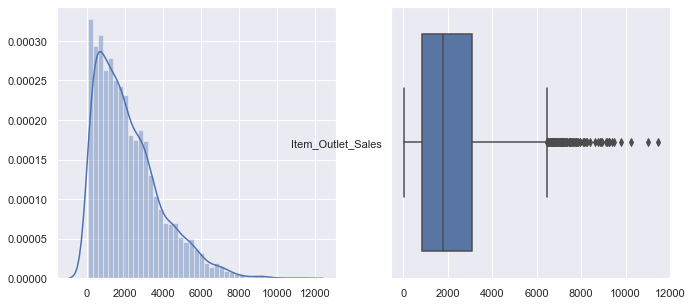

In [11]:
print(f"Skewness of Outlet Sales    : {df.Item_Outlet_Sales.skew():.3f}")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 5))
sns.distplot(df[["Item_Outlet_Sales"]], ax = ax1)
sns.boxplot(data=df[["Item_Outlet_Sales"]], orient='h', ax = ax2)

The distribution is right skewed. Let us check the percentage of outliers present.

In [12]:
# inter-quartile range of target
Q1 = np.quantile(df.Item_Outlet_Sales.values, 0.25)
Q3 = np.quantile(df.Item_Outlet_Sales.values, 0.75)
IQR = Q3 - Q1

outlier_count = df[df['Item_Outlet_Sales'] > (Q3 + 1.5*IQR)]['Item_Outlet_Sales'].count()
print(f"Percentage of outlier present is {outlier_count/len(df)*100:.2f} %")

Percentage of outlier present is 2.28 %


Since the outlier count is less than 5% we will drop those rows.

Any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier

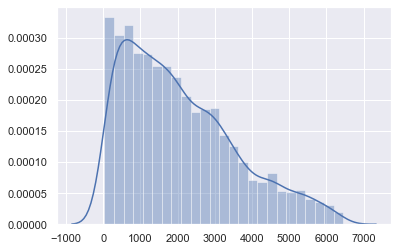

In [13]:
# Get values of indexes for which sales column is an outlier
index_values = df[df['Item_Outlet_Sales'] > (Q3 + 1.5*IQR)].index

# Delete these row indexes from dataFrame
df.drop(index_values , inplace = True)

sns.distplot(df[["Item_Outlet_Sales"]])

In [14]:
'''from scipy import stats

print(f"Range of Outlet Sales is {df.Item_Outlet_Sales.min():.3f} to {df.Item_Outlet_Sales.max():.3f}\n")

outlet_sales, lambda_os = stats.boxcox(df.Item_Outlet_Sales)
df.Item_Outlet_Sales = outlet_sales

print(f"Skewness of Item_Outlet_Sales : {df.Item_Outlet_Sales.skew():.3f}")
print(f"Lambda value for the plot     : {lambda_os:.3f}")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 5))
sns.distplot(df[["Item_Outlet_Sales"]], ax = ax1)
sns.boxplot(data=df[["Item_Outlet_Sales"]], orient='h', ax = ax2)'''

'from scipy import stats\n\nprint(f"Range of Outlet Sales is {df.Item_Outlet_Sales.min():.3f} to {df.Item_Outlet_Sales.max():.3f}\n")\n\noutlet_sales, lambda_os = stats.boxcox(df.Item_Outlet_Sales)\ndf.Item_Outlet_Sales = outlet_sales\n\nprint(f"Skewness of Item_Outlet_Sales : {df.Item_Outlet_Sales.skew():.3f}")\nprint(f"Lambda value for the plot     : {lambda_os:.3f}")\n\nfig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 5))\nsns.distplot(df[["Item_Outlet_Sales"]], ax = ax1)\nsns.boxplot(data=df[["Item_Outlet_Sales"]], orient=\'h\', ax = ax2)'

##### Item_Visibility

Skewness of Item Visibility : 1.172


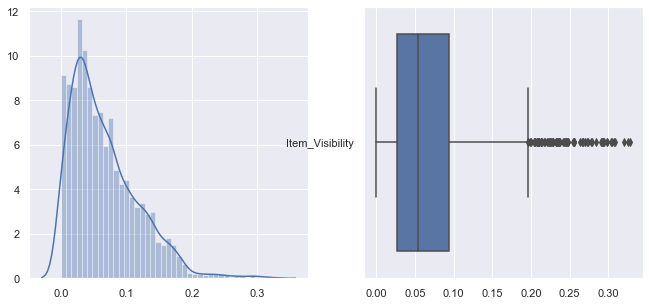

In [15]:
print(f"Skewness of Item Visibility : {df.Item_Visibility.skew():.3f}")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 5))
sns.distplot(df[["Item_Visibility"]], ax = ax1)
sns.boxplot(data=df[["Item_Visibility"]], orient='h', ax = ax2)

In [16]:
# inter-quartile range of visibility
Q1 = np.quantile(df.Item_Visibility.values, 0.25)
Q3 = np.quantile(df.Item_Visibility.values, 0.75)
IQR = Q3 - Q1

outlier_count = df[df['Item_Visibility'] > (Q3 + 1.5*IQR)]['Item_Visibility'].count()
print(f"Percentage of outlier present is {outlier_count/len(df)*100:.2f} %")

Percentage of outlier present is 1.64 %


Since the outlier count is less than 5% we will drop those rows.

In [17]:
# Get values of indexes for which sales column is an outlier
index_values = df[df['Item_Visibility'] > (Q3 + 1.5*IQR)].index

# Delete these row indexes from dataFrame
df.drop(index_values, inplace = True)

sns.distplot(df[["Item_Visibility"]], ax = ax1)
sns.boxplot(data=df[["Item_Visibility"]], orient='h', ax = ax2)

In [18]:
from sklearn.impute import SimpleImputer

df.Item_Visibility = df.Item_Visibility.replace(0, np.nan)

simple_imputer = SimpleImputer()
df[["Item_Visibility"]] = simple_imputer.fit_transform(df[["Item_Visibility"]])

df[df['Item_Visibility'] == 0].count()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Range of visibility is 0.004 to 0.196
Skewness of Item Visibility : -0.058
Lambda value for the plot   : 0.332


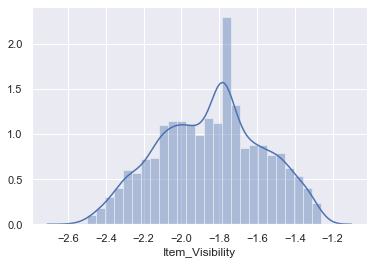

In [19]:
from scipy import stats

# The lower range value of the feature is 0. Let us add a small value uniformly to all the rows for the feature.
#df.Item_Visibility = df.Item_Visibility + 0.001

print(f"Range of visibility is {df.Item_Visibility.min():.3f} to {df.Item_Visibility.max():.3f}")

visibility, lambda_iv = stats.boxcox(df.Item_Visibility)
df.Item_Visibility = visibility
print(f"Skewness of Item Visibility : {df.Item_Visibility.skew():.3f}")
print(f"Lambda value for the plot   : {lambda_iv:.3f}")
sns.distplot(df.Item_Visibility)

##### Now, we have taken care of the outliers and the null values.

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,-2.249073,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,-2.201050,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,-2.237955,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,-1.784185,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,-1.784185,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##### Creating a separate dataframe for numeric variables

In [21]:
df_numeric = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']]
df_numeric.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,-2.249073,249.8092,3735.1380
1,5.92,-2.201050,48.2692,443.4228
2,17.50,-2.237955,141.6180,2097.2700
3,19.20,-1.784185,182.0950,732.3800
4,8.93,-1.784185,53.8614,994.7052


##### Feature Scaling of this numeric dataframe

In [22]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# eliminating output from feature scaling
df_numeric_mod = df_numeric.drop('Item_Outlet_Sales', axis = 1)

scaler.fit(df_numeric_mod)
df_numeric_scaled = scaler.transform(df_numeric_mod)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns = df_numeric_mod.columns)

df_numeric_scaled = pd.concat([df_numeric_scaled, df_numeric[['Item_Outlet_Sales']]], axis = 1)
df_numeric_scaled.head()'''

"from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\n\n# eliminating output from feature scaling\ndf_numeric_mod = df_numeric.drop('Item_Outlet_Sales', axis = 1)\n\nscaler.fit(df_numeric_mod)\ndf_numeric_scaled = scaler.transform(df_numeric_mod)\ndf_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns = df_numeric_mod.columns)\n\ndf_numeric_scaled = pd.concat([df_numeric_scaled, df_numeric[['Item_Outlet_Sales']]], axis = 1)\ndf_numeric_scaled.head()"

##### Check before and after values using kdeplot

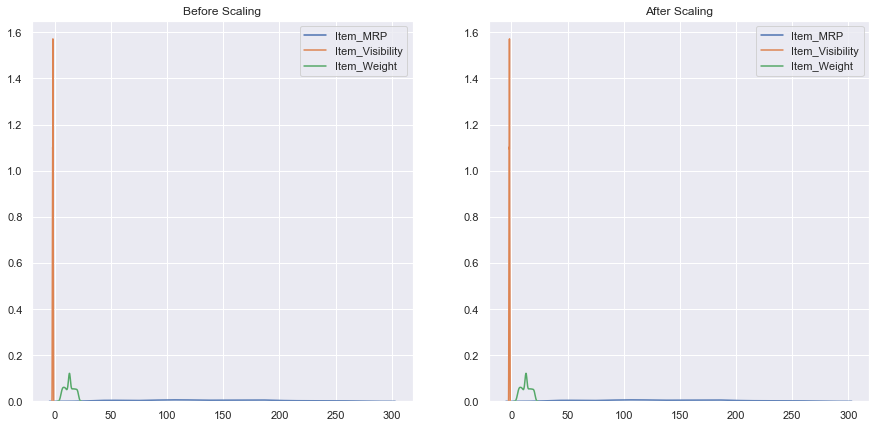

In [23]:
df_numeric_scaled = df_numeric
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df_numeric['Item_MRP'], ax=ax1)
sns.kdeplot(df_numeric['Item_Visibility'], ax=ax1)
sns.kdeplot(df_numeric['Item_Weight'], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(df_numeric_scaled['Item_MRP'], ax=ax2)
sns.kdeplot(df_numeric_scaled['Item_Visibility'], ax=ax2)
sns.kdeplot(df_numeric_scaled['Item_Weight'], ax=ax2)

plt.show()

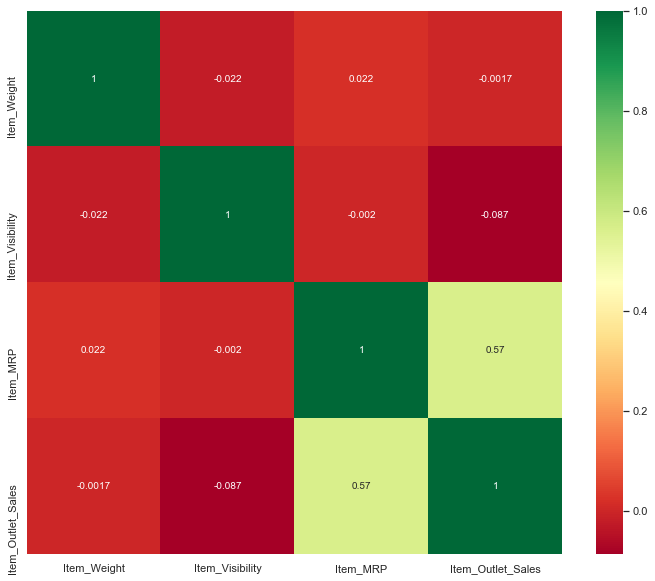

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric_scaled.corr(), annot=True, cmap ='RdYlGn')

We can see that the sales are significantly highly affected by item MRP as compared to item's visibility an weight.

We might thing of dropping the less significant variable while model building.

##### Let us process the categorical variables now

Dropping numeric columns from the dataframe and creating a new dataframe for categorical data

In [25]:
df_cat = df.drop(['Item_Visibility', 'Item_Outlet_Sales', 'Item_MRP', 'Item_Weight'], axis = 1)
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,Unknown,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


##### Renaming columns for better usage

In [26]:
df_cat.rename({'Item_Fat_Content':'Fat_Content',
              'Item_Type':'Type',
              'Outlet_Establishment_Year': 'Year',
              'Outlet_Size': 'Size',
              'Outlet_Location_Type':'Location'}, inplace=True, axis = 1)
df_cat.head()

,Item_Identifier,Fat_Content,Type,Outlet_Identifier,Year,Size,Location,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,Unknown,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


<center><h3>
    Initial analysis of each column

<table>
    <tr>
    <th>Column Name</th>
    <th>Analysis</th>
    </tr>
    <tr>
        <td>Item_Identifier</td>
        <td>It is a unique column so we will drop it</td>
    </tr>
    <tr>
        <td>Fat_Content</td>
        <td>We will perform label encoding since it has ordinal variable</td>
    </tr>
    <tr>
        <td>Type</td>
        <td>We will perform on-hot encoding since it has nominal variable</td>
    </tr>
    <tr>
        <td>Outlet_Identifier</td>
        <td>We will try to find relation of this feature with Size</td>
    </tr>
    <tr>
        <td>Year</td>
        <td>We will change this column to represent age of the outlet</td>
    </tr>
    <tr>
        <td>Location</td>
        <td>This can be changed to label encoded since it has ordinal variables</td>
    </tr>
    <tr>
        <td>Size</td>
        <td>This can be changed to label encoded since it has ordinal variables</td>
    </tr>
    <tr>
        <td>Outlet_Type</td>
        <td>We can perform one hot encoding since it consists of nominal variable</td>
    </tr>
</table>

##### Dropping the item_identifier column

In [27]:
df_cat = df_cat.drop(['Item_Identifier'], axis=1)

##### Checking values in each label_encoded fields

In [28]:
print(f"--- Column: Fat_Content ---\n{df_cat.Fat_Content.value_counts()}")
print(f"\n--- Column: Location ---\n{df_cat.Location.value_counts()}")
print(f"\n--- Column: Size ---\n{df_cat.Size.value_counts()}")

--- Column: Fat_Content ---
Low Fat    2789
Regular    1553
LF          164
reg          66
low fat      57
Name: Fat_Content, dtype: int64

--- Column: Location ---
Tier 3    1774
Tier 2    1587
Tier 1    1268
Name: Location, dtype: int64

--- Column: Size ---
Medium     1467
Unknown    1338
Small      1289
High        535
Name: Size, dtype: int64


From the above data we can see that in Fat_Content column we have ambiguous values.

Low Fat, low_fat and LF mean the same. 

Regular and reg mean the same.

So combining them we can have just two values.

Instead of label encoding we will perform one-hot encoding for the variable

In [29]:
df_cat['Fat_Content'].replace({
                'Low Fat':'LF',
                'low fat':'LF',
                'reg':'Regular'
                }, inplace = True,
              )
df_cat['Fat_Content'].value_counts()

LF         3010
Regular    1619
Name: Fat_Content, dtype: int64

##### One-Hot Encoding Fat_Content

In [30]:
fat_encoded = pd.get_dummies(df_cat['Fat_Content'])

Since fat_encoded consistss of only 2 columns, so we will drop one column and derive the other quantity through the retained column

In [31]:
fat_encoded.drop('LF', axis = 1, inplace = True)
fat_encoded.head()

,Regular
0,0
1,1
2,0
3,1
4,0


##### Check if any relation exists between outlet_identifier and size

In [32]:
df_cat.Outlet_Identifier.value_counts()

OUT045    540
OUT013    535
OUT035    529
OUT046    529
OUT017    518
OUT049    508
OUT018    498
OUT027    461
OUT010    280
OUT019    231
Name: Outlet_Identifier, dtype: int64

In [33]:
df_cat[df_cat['Outlet_Identifier'].eq('OUT045')]['Size'].unique()

array(['Unknown'], dtype=object)

<b>Note:</b>In the above output we can see that the outlet_identifier with value 'OUT045' has size value of Unknown

Similarly, when we check for all the values of the outlet_identifier column we get just one unique value

Therefore, the columns resemble one-to-one relationship

We will drop either of them, let us drop outlet_identifier since it has more unique values

In [34]:
df_cat.drop('Outlet_Identifier', axis = 1, inplace = True)
df_cat.head()

,Fat_Content,Type,Year,Size,Location,Outlet_Type
0,LF,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,2009,Medium,Tier 3,Supermarket Type2
2,LF,Meat,1999,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,1998,Unknown,Tier 3,Grocery Store
4,LF,Household,1987,High,Tier 3,Supermarket Type1


#### Label encoding the ordinal variables

In [35]:
from sklearn.preprocessing import LabelEncoder

# using library
label_encoder = LabelEncoder()
df_cat['Location'] = label_encoder.fit_transform(df_cat['Location'])

# without using library
df_cat.Size = df_cat.Size.replace({'Small': 0, 'Medium':1,  'High': 2, 'Unknown': 3})

df_cat.head()

,Fat_Content,Type,Year,Size,Location,Outlet_Type
0,LF,Dairy,1999,1,0,Supermarket Type1
1,Regular,Soft Drinks,2009,1,2,Supermarket Type2
2,LF,Meat,1999,1,0,Supermarket Type1
3,Regular,Fruits and Vegetables,1998,3,2,Grocery Store
4,LF,Household,1987,2,2,Supermarket Type1


In [36]:
df_cat.head()

,Fat_Content,Type,Year,Size,Location,Outlet_Type
0,LF,Dairy,1999,1,0,Supermarket Type1
1,Regular,Soft Drinks,2009,1,2,Supermarket Type2
2,LF,Meat,1999,1,0,Supermarket Type1
3,Regular,Fruits and Vegetables,1998,3,2,Grocery Store
4,LF,Household,1987,2,2,Supermarket Type1


#### One hot encoding nominal data

In [37]:
# using pandas dummies to one hot encode two nominal variable features
outlet_type_df = pd.get_dummies(df_cat.Outlet_Type)
item_type_df = pd.get_dummies(df_cat.Type)

#dropping one column from each of the one hot encoded dataframes
item_type_df.drop("Others", axis = 1, inplace = True)
outlet_type_df.drop("Grocery Store", axis = 1, inplace = True)

onehot_encoded_df = pd.concat([item_type_df, outlet_type_df], axis = 1)
onehot_encoded_df.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


#### Changing Outlet Establishment Year column to Age

In [38]:
df_cat.rename({'Year':'Age'}, axis = 1, inplace = True)
df_cat.Age = 2020 - df_cat.Age

df_cat.head()

,Fat_Content,Type,Age,Size,Location,Outlet_Type
0,LF,Dairy,21,1,0,Supermarket Type1
1,Regular,Soft Drinks,11,1,2,Supermarket Type2
2,LF,Meat,21,1,0,Supermarket Type1
3,Regular,Fruits and Vegetables,22,3,2,Grocery Store
4,LF,Household,33,2,2,Supermarket Type1


##### Concatenating the one hot encoded variables with the df_cat and dropping the representative fields

In [39]:
df_categ = df_cat.copy()

df_categ.drop(['Fat_Content', 'Type', 'Outlet_Type'], axis = 1, inplace = True)

df_categ = pd.concat([df_categ, fat_encoded, onehot_encoded_df], axis = 1)

print(df_categ.columns)
print(df_categ.dtypes)
df_categ.head()

Index(['Age', 'Size', 'Location', 'Regular', 'Baking Goods', 'Breads',
       'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables',
       'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')
Age                      int64
Size                     int64
Location                 int32
Regular                  uint8
Baking Goods             uint8
Breads                   uint8
Breakfast                uint8
Canned                   uint8
Dairy                    uint8
Frozen Foods             uint8
Fruits and Vegetables    uint8
Hard Drinks              uint8
Health and Hygiene       uint8
Household                uint8
Meat                     uint8
Seafood                  uint8
Snack Foods              uint8
Soft Drinks              uint8
Starchy Foods            uint8
Supermarket Type1        uint8
Superm

,Age,Size,Location,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Health and Hygiene,Household,Meat,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,21,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,11,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,21,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,22,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,2,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


We have eliminated all the string values and encoded for the model building

<center><h1>Model Building

##### Concatenating both the processed dataframes for numeric and categorical variables

In [40]:
df_model = pd.concat([df_numeric_scaled, df_categ], axis = 1)
df_model.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Age,Size,Location,Regular,Baking Goods,Breads,...,Health and Hygiene,Household,Meat,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,-2.249073,249.8092,3735.1380,21,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,-2.201050,48.2692,443.4228,11,1,2,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.50,-2.237955,141.6180,2097.2700,21,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,19.20,-1.784185,182.0950,732.3800,22,3,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,-1.784185,53.8614,994.7052,33,2,2,0,0,0,...,0,1,0,0,0,0,0,1,0,0


#### Defining predictors and predicted variable

In [41]:
y = df_model['Item_Outlet_Sales']
X = df_model.drop(['Item_Outlet_Sales'], axis = 1)

#### Splitting the dataset as training and testing after adding a constant b0

In [42]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# adding a constant to the matrix X
X_addC = sm.add_constant(X)

# normalizing vector X
#from sklearn.preprocessing import normalize
#X_norm = normalize(X_addC)

X_train, X_test, y_train, y_test = train_test_split(X_addC, y, test_size = 0.25)

C:\Users\MAC Pathak\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
C:\Users\MAC Pathak\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### Performing linear regression on the test set

In [43]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

#### Calculating the metrics for the model

In [44]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
)

r_score = r2_score(y_test, y_pred)    # r-square
n = len(X_test)                       # no of samples
p = len(X_test.columns)               # no of features

print(f"R-squared     : {r_score:.3f}")
print(f"Adj R-squared : {1-(1-r_score)*((n-1)/(n-p-1)):.3f}")
print(f"RMSE          : {mean_squared_error(y_test, y_pred)**0.5:.3f}")

R-squared     : 0.551
Adj R-squared : 0.541
RMSE          : 1022.310


#### Use the below code cell to build the model using selective features and check the metrics

In [45]:
df_model.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Age', 'Size', 'Location', 'Regular', 'Baking Goods', 'Breads',
       'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables',
       'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [46]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
)


def build_model(X, y):
    X_addC = sm.add_constant(X) 
    X_train, X_test, y_train, y_test = train_test_split(X_addC, y, test_size = 0.25)
    
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    y_pred = linear_reg.predict(X_test)
    
    r_score = r2_score(y_test, y_pred)    # r-square
    n = len(X_test)                       # no of samples
    p = len(X_test.columns)               # no of features
    
    print(f"R-squared     : {r_score:.3f}")
    print(f"Adj R-squared : {1-(1-r_score)*((n-1)/(n-p-1)):.3f}")
    print(f"RMSE          : {mean_squared_error(y_test, y_pred)**0.5:.3f}")


y = df_numeric_scaled['Item_Outlet_Sales']

# Select the features
df_model = pd.concat([df_numeric_scaled, onehot_encoded_df], axis = 1)
X = df_model.drop(['Item_Outlet_Sales','Item_Weight',], axis = 1)

build_model(X, y)

R-squared     : 0.529
Adj R-squared : 0.521
RMSE          : 1013.882


C:\Users\MAC Pathak\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
from scipy.special import inv_boxcox

inv_boxcox(outlet_sales)

NameError: name 'outlet_sales' is not defined

In [ ]:
X_train.isnull().sum()